In [1]:
import selection_sort as selection
import heap_sort as heap
import merge_sort as merge
import quick_sort as quick
import random
from timeit import Timer

In [2]:
def crear_listas_con_10k_elementos(N):
    lista = list()
    for i in range(N):
        set1 = list(range(10000))
        random.shuffle(set1)
        lista.append(set1)
    return lista

In [3]:
## item b)
sets_datos = crear_listas_con_10k_elementos(10)
#defino la cantidad de elementos que quiero hacer
cantidad_de_elementos_set = [50, 100] #, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
lista_algoritmos = [heap.heap_sort, selection.selection_sort, merge.merge_sort, quick.quick_sort]

resultados = {}

conjunto = 0;
for set_actual in sets_datos:
    resultados_por_cantidad_elementos = {}
    for i in cantidad_de_elementos_set:
        lista_resultados_por_algoritmo = list()
        resultados_por_set = {}
        # agarro y a cada algoritmo de la lista lista_algoritmos le tomo el tiempo
        # que tarda en ordenar la lista en set_actual
        for f in lista_algoritmos:
            parametro_lista = set_actual[:i]
            t = Timer(lambda: f(parametro_lista))
            tiempo = t.timeit(2)
            lista_resultados_por_algoritmo.append(tiempo)
        resultados_por_cantidad_elementos[i] = lista_resultados_por_algoritmo
    # guardo todos los resultados de cada conjunto de datos para cada cantidad de elementos para cada algoritmo
    resultados[conjunto] = resultados_por_cantidad_elementos
    conjunto += 1

## item c)
tiempos_medio_algoritmo_rango = {}

for i in resultados.keys():
    print ('Conjunto de datos' + str(i)) 
    for j in resultados[i].keys():
        print ('Cantidad de elementos: ' + str(j))
        print ('heap sort:' + str(resultados[i][j][0]))
        print ('selection sort:' + str(resultados[i][j][1]))
        print ('merge sort:' + str(resultados[i][j][2]))
        print ('quick sort:' + str(resultados[i][j][3]))
        if i == 0:
            tiempos_medio_algoritmo_rango[j] = {'heapsort': resultados[i][j][0], 'selectionsort' : resultados[i][j][1]
                                           ,'mergesort': resultados[i][j][2], 'quicksort': resultados[i][j][3]}
        else:
            tiempos_medio_algoritmo_rango[j] = {'heapsort': (tiempos_medio_algoritmo_rango[j]['heapsort'] + resultados[i][j][0])*.5, 'selectionsort' : (tiempos_medio_algoritmo_rango[j]['selectionsort'] + resultados[i][j][1])*.5
                                           ,'mergesort': (tiempos_medio_algoritmo_rango[j]['mergesort'] + resultados[i][j][2])*.5, 'quicksort': (tiempos_medio_algoritmo_rango[j]['quicksort'] + resultados[i][j][3])*.5}

## item d)
for t in tiempos_medio_algoritmo_rango.keys():
    print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))

Conjunto de datos0
Cantidad de elementos: 50
heap sort:0.0006800589999897966
selection sort:0.0003847730000074989
merge sort:0.0004576550000479074
quick sort:0.0005674650000173642
Cantidad de elementos: 100
heap sort:0.0015247960000124294
selection sort:0.0015448180000134926
merge sort:0.0009530479999853014
quick sort:0.002017748999946889
Conjunto de datos1
Cantidad de elementos: 50
heap sort:0.0006710849999649326
selection sort:0.00041572000003498033
merge sort:0.000452748000043357
quick sort:0.0005557590000080381
Cantidad de elementos: 100
heap sort:0.0015415189999998802
selection sort:0.001537973999973019
merge sort:0.0009491299999808689
quick sort:0.0019657230000120762
Conjunto de datos2
Cantidad de elementos: 50
heap sort:0.0006675829999949201
selection sort:0.00040680500001144537
merge sort:0.0004529279999587743
quick sort:0.0005520800000340387
Cantidad de elementos: 100
heap sort:0.0015314629999920726
selection sort:0.0014830549999942377
merge sort:0.0009511399999837522
quick so

t 50
t 100
heapsort
[50, 100]
[0.0006594517773321762, 0.0015579287285295562]


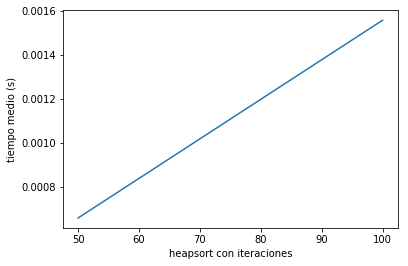

selectionsort
[50, 100]
[0.00040922764648687604, 0.0015707816992245327]


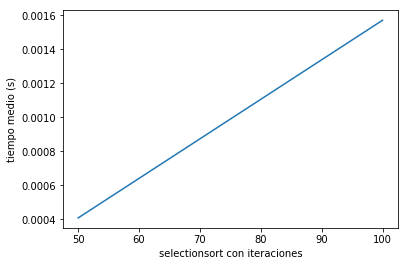

mergesort
[50, 100]
[0.0004524214433488938, 0.0009755118710975674]


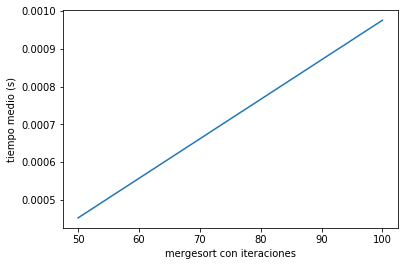

quicksort
[50, 100]
[0.0005637904140816108, 0.0019741221992408686]


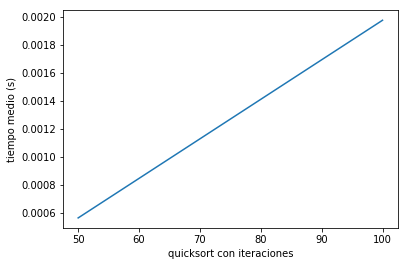

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

#grafico los tiempos medios para cada algoritmo
algoritmos_x = {}
algoritmos_y = {}
for t in tiempos_medio_algoritmo_rango.keys():
    print ('t ' + str(t))
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg] = list()    
        algoritmos_y[alg] = list()
        
for t in tiempos_medio_algoritmo_rango.keys():
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg].append(t)
        algoritmos_y[alg].append(tiempos_medio_algoritmo_rango[t][alg])
    #print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    #print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    #print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    #print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    #print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
for alg in algoritmos_x.keys():
    print(alg)
    print(algoritmos_x[alg])
    print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg])
    plt.xlabel(alg + ' con iteraciones')   
    plt.ylabel('tiempo medio (s)')
    plt.show()
        
        
    #algoritmo1_y.append(tiempos_medio_algoritmo_rango[t]['heapsort'])
    #print ([t,tiempos_medio_algoritmo_rango[t]['heapsort']])
# tendria que agarrar un algoritmo y graficar todos sus tiempos

#plt.plot(algoritmo1_x, algoritmo1_y)
#plt.xlabel('iteraciones')
#plt.ylabel('tiempo medio')
#plt.show()